## Diabetic Retinopathy

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from scipy.io import arff

#Importing Diabetic Retinopathy Dataset
dataset, meta = arff.loadarff('messidor_features.arff')
data = pd.DataFrame(dataset)
X = data.iloc[:, :19].values
Y = data.iloc[:, 19].values

print(data)
print(X.shape)
print(Y.shape)

        0    1     2     3     4     5     6     7          8          9  \
0     1.0  1.0  22.0  22.0  22.0  19.0  18.0  14.0  49.895756  17.775994   
1     1.0  1.0  24.0  24.0  22.0  18.0  16.0  13.0  57.709936  23.799994   
2     1.0  1.0  62.0  60.0  59.0  54.0  47.0  33.0  55.831441  27.993933   
3     1.0  1.0  55.0  53.0  53.0  50.0  43.0  31.0  40.467228  18.445954   
4     1.0  1.0  44.0  44.0  44.0  41.0  39.0  27.0  18.026254   8.570709   
...   ...  ...   ...   ...   ...   ...   ...   ...        ...        ...   
1146  1.0  1.0  34.0  34.0  34.0  33.0  31.0  24.0   6.071765   0.937472   
1147  1.0  1.0  49.0  49.0  49.0  49.0  45.0  37.0  63.197145  27.377668   
1148  1.0  0.0  49.0  48.0  48.0  45.0  43.0  33.0  30.461898  13.966980   
1149  1.0  1.0  39.0  36.0  29.0  23.0  13.0   7.0  40.525739  12.604947   
1150  1.0  1.0   7.0   7.0   7.0   7.0   7.0   5.0  69.423565   7.031843   

             10        11        12        13        14        15        16  \
0      5

In [2]:
meta

Dataset: dr
	0's type is numeric
	1's type is numeric
	2's type is numeric
	3's type is numeric
	4's type is numeric
	5's type is numeric
	6's type is numeric
	7's type is numeric
	8's type is numeric
	9's type is numeric
	10's type is numeric
	11's type is numeric
	12's type is numeric
	13's type is numeric
	14's type is numeric
	15's type is numeric
	16's type is numeric
	17's type is numeric
	18's type is numeric
	Class's type is nominal, range is ('0', '1')

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)
print(Y)

[0 0 1 ... 0 1 0]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

names = ['KNeighborsClassifier','SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB','MLPClassifier']
models = [KNeighborsClassifier(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          LogisticRegression(),
          GaussianNB(),
          MLPClassifier()]

param_distributions = {
    'KNeighborsClassifier': {'n_neighbors': [10,20,50,80], 'metric':['minkowski','euclidean']},
    'SVC': {'kernel':['rbf', 'linear'], 'C': np.logspace(-1, 1, 3), 'gamma':np.logspace(0, 2, 3)},
    'DecisionTreeClassifier': {'criterion':['gini','entropy'], 'max_depth': [10,20,30,50]},
    'RandomForestClassifier': {'n_estimators': [20,40,60]},
    'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate':[0.01,0.5,0.8]},
    'LogisticRegression': {'max_iter':[100,130,140],'C': np.logspace(-2, 2, 5), 'solver':['lbfgs','liblinear']},
    'GaussianNB': {},
    'MLPClassifier': {'hidden_layer_sizes': [(10,),(100,),(200,)],'activation':['tanh', 'relu'], 'max_iter': [100,200]}
}

accuracy= np.zeros(8)
for counter, model in enumerate(models):
    np.random.seed(0);
    gridcv = GridSearchCV(model, param_distributions[names[counter]], n_jobs=2, cv=3)
    gridcv.fit(X_train, Y_train)
    Y_pred = gridcv.best_estimator_.predict(X_test)
    accuracy[counter] = round(f1_score(Y_test, Y_pred, average='micro'),3)
    print("f1_score for " + names[counter] + ":",accuracy[counter])

f1_score for KNeighborsClassifier: 0.647
f1_score for SVC: 0.75
f1_score for DecisionTreeClassifier: 0.632
f1_score for RandomForestClassifier: 0.674
f1_score for AdaBoostClassifier: 0.695
f1_score for LogisticRegression: 0.745
f1_score for GaussianNB: 0.618
f1_score for MLPClassifier: 0.739


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Diabetic Retinopathy dataset models')

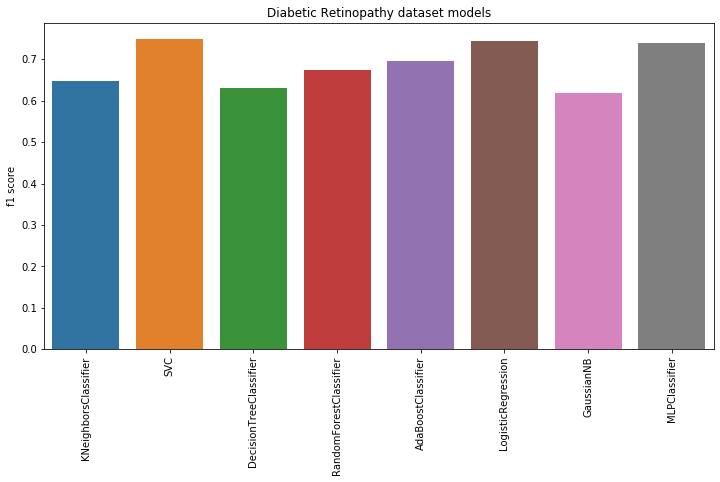

In [7]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6],accuracy[7]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('f1 score')
plt.title('Diabetic Retinopathy dataset models')